In [1]:
import pandas as pd
import numpy as np
import alphalens as al
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
factor_data = pd.read_csv('./test/alphalens/factor_data/factor_data_AI_ALPHA.csv', index_col=['date', 'asset'], parse_dates=['date'])

In [3]:
factor_data.head()

,,1D,5D,10D,factor,factor_quantile
date,asset,,,,,
2015-01-05,AEONTS,0.004630,0.027778,0.041667,0.480389,4
2015-01-06,AEONTS,0.004608,0.027650,0.078341,0.478923,4
2015-01-07,AEONTS,0.009174,0.022936,0.082569,0.477406,4
2015-01-08,AEONTS,0.000000,0.013636,0.054545,0.465027,2
2015-01-09,AEONTS,0.009091,0.018181,0.045454,0.464405,2


In [4]:
# set parameters
demeaned = False
group_adjust = False
equal_weight = False

Returns Analysis


,1D,5D,10D
Ann. alpha,0.011,0.008,0.006
beta,1.005,1.003,1.003
Mean Period Wise Return Top Quantile (bps),21.431,17.803,14.479
Mean Period Wise Return Bottom Quantile (bps),-11.543,-8.195,-4.328
Mean Period Wise Spread (bps),32.974,25.770,18.571


<Figure size 1800x2000 with 0 Axes>

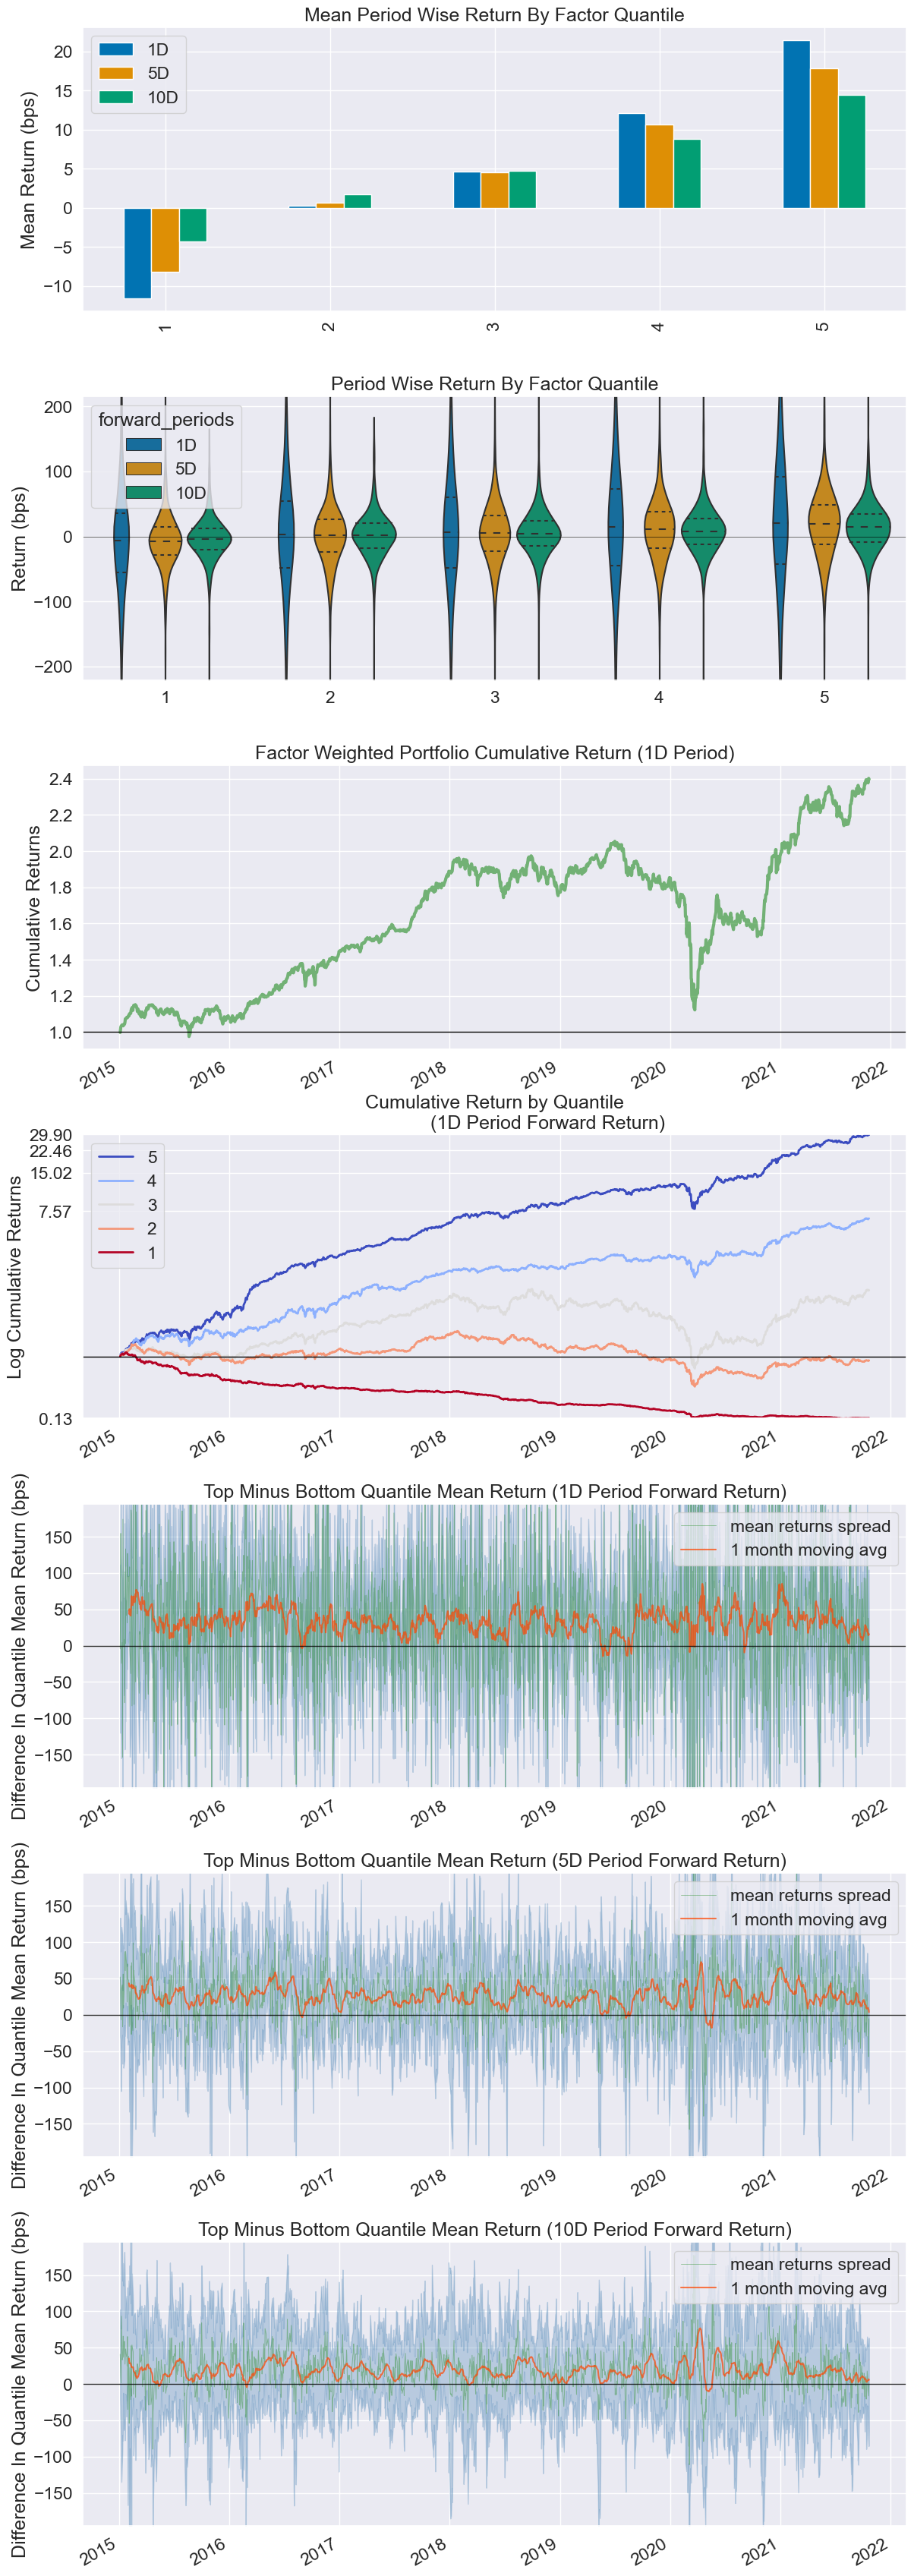

In [5]:
# Return analysis
plt.figure(figsize=(18, 20))
al.tears.create_returns_tear_sheet(factor_data,
                                   long_short=False,
                                   group_neutral=False,
                                   by_group=False)

Information Analysis


,1D,5D,10D
IC Mean,0.071,0.146,0.141
IC Std.,0.160,0.161,0.156
Risk-Adjusted IC,0.443,0.906,0.905
t-stat(IC),18.041,36.885,36.817
p-value(IC),0.000,0.000,0.000
IC Skew,-0.062,-0.128,-0.128
IC Kurtosis,-0.297,-0.216,-0.080


<Figure size 640x480 with 0 Axes>

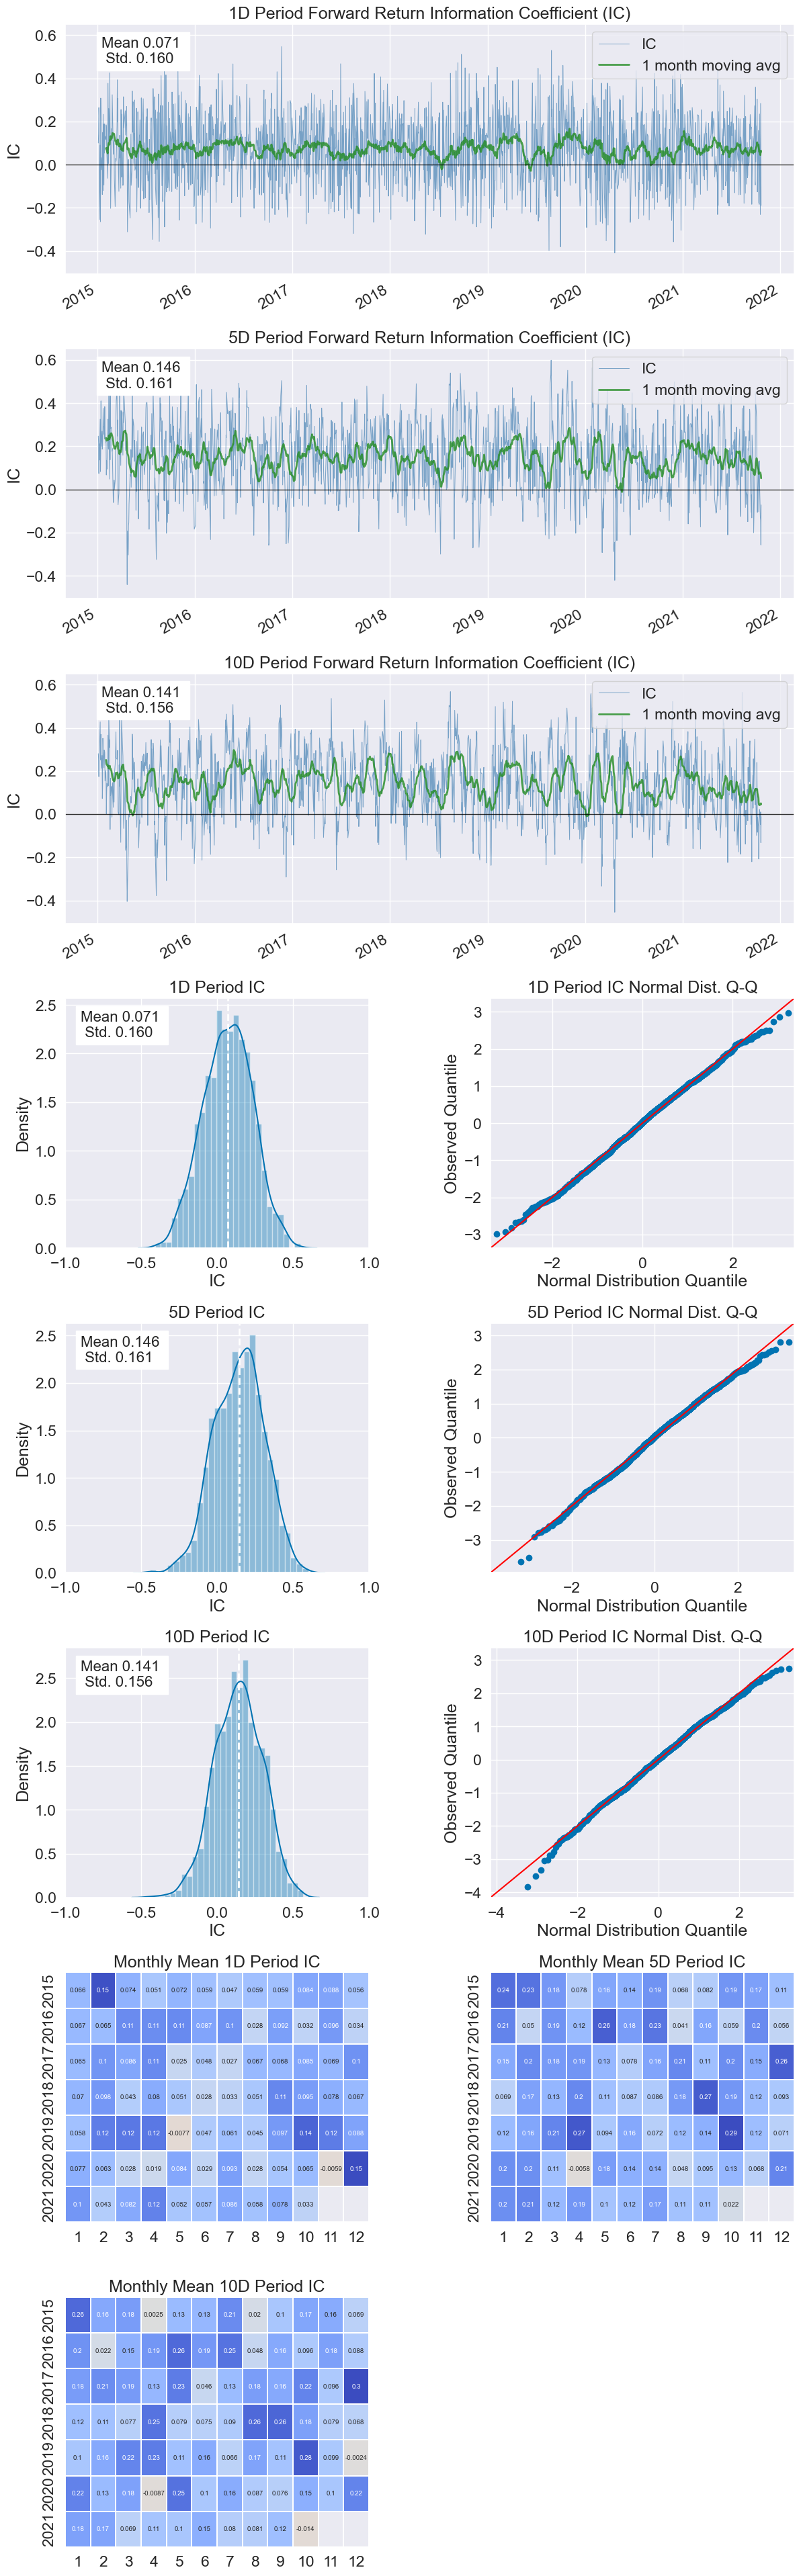

In [6]:
# Information coefficient analysis
al.tears.create_information_tear_sheet(factor_data,
                                       group_neutral=False,
                                       by_group=False)

Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.417,0.571,0.631
Quantile 2 Mean Turnover,0.631,0.739,0.764
Quantile 3 Mean Turnover,0.666,0.753,0.769
Quantile 4 Mean Turnover,0.638,0.738,0.766
Quantile 5 Mean Turnover,0.430,0.592,0.648


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.642,0.393,0.291


<Figure size 640x480 with 0 Axes>

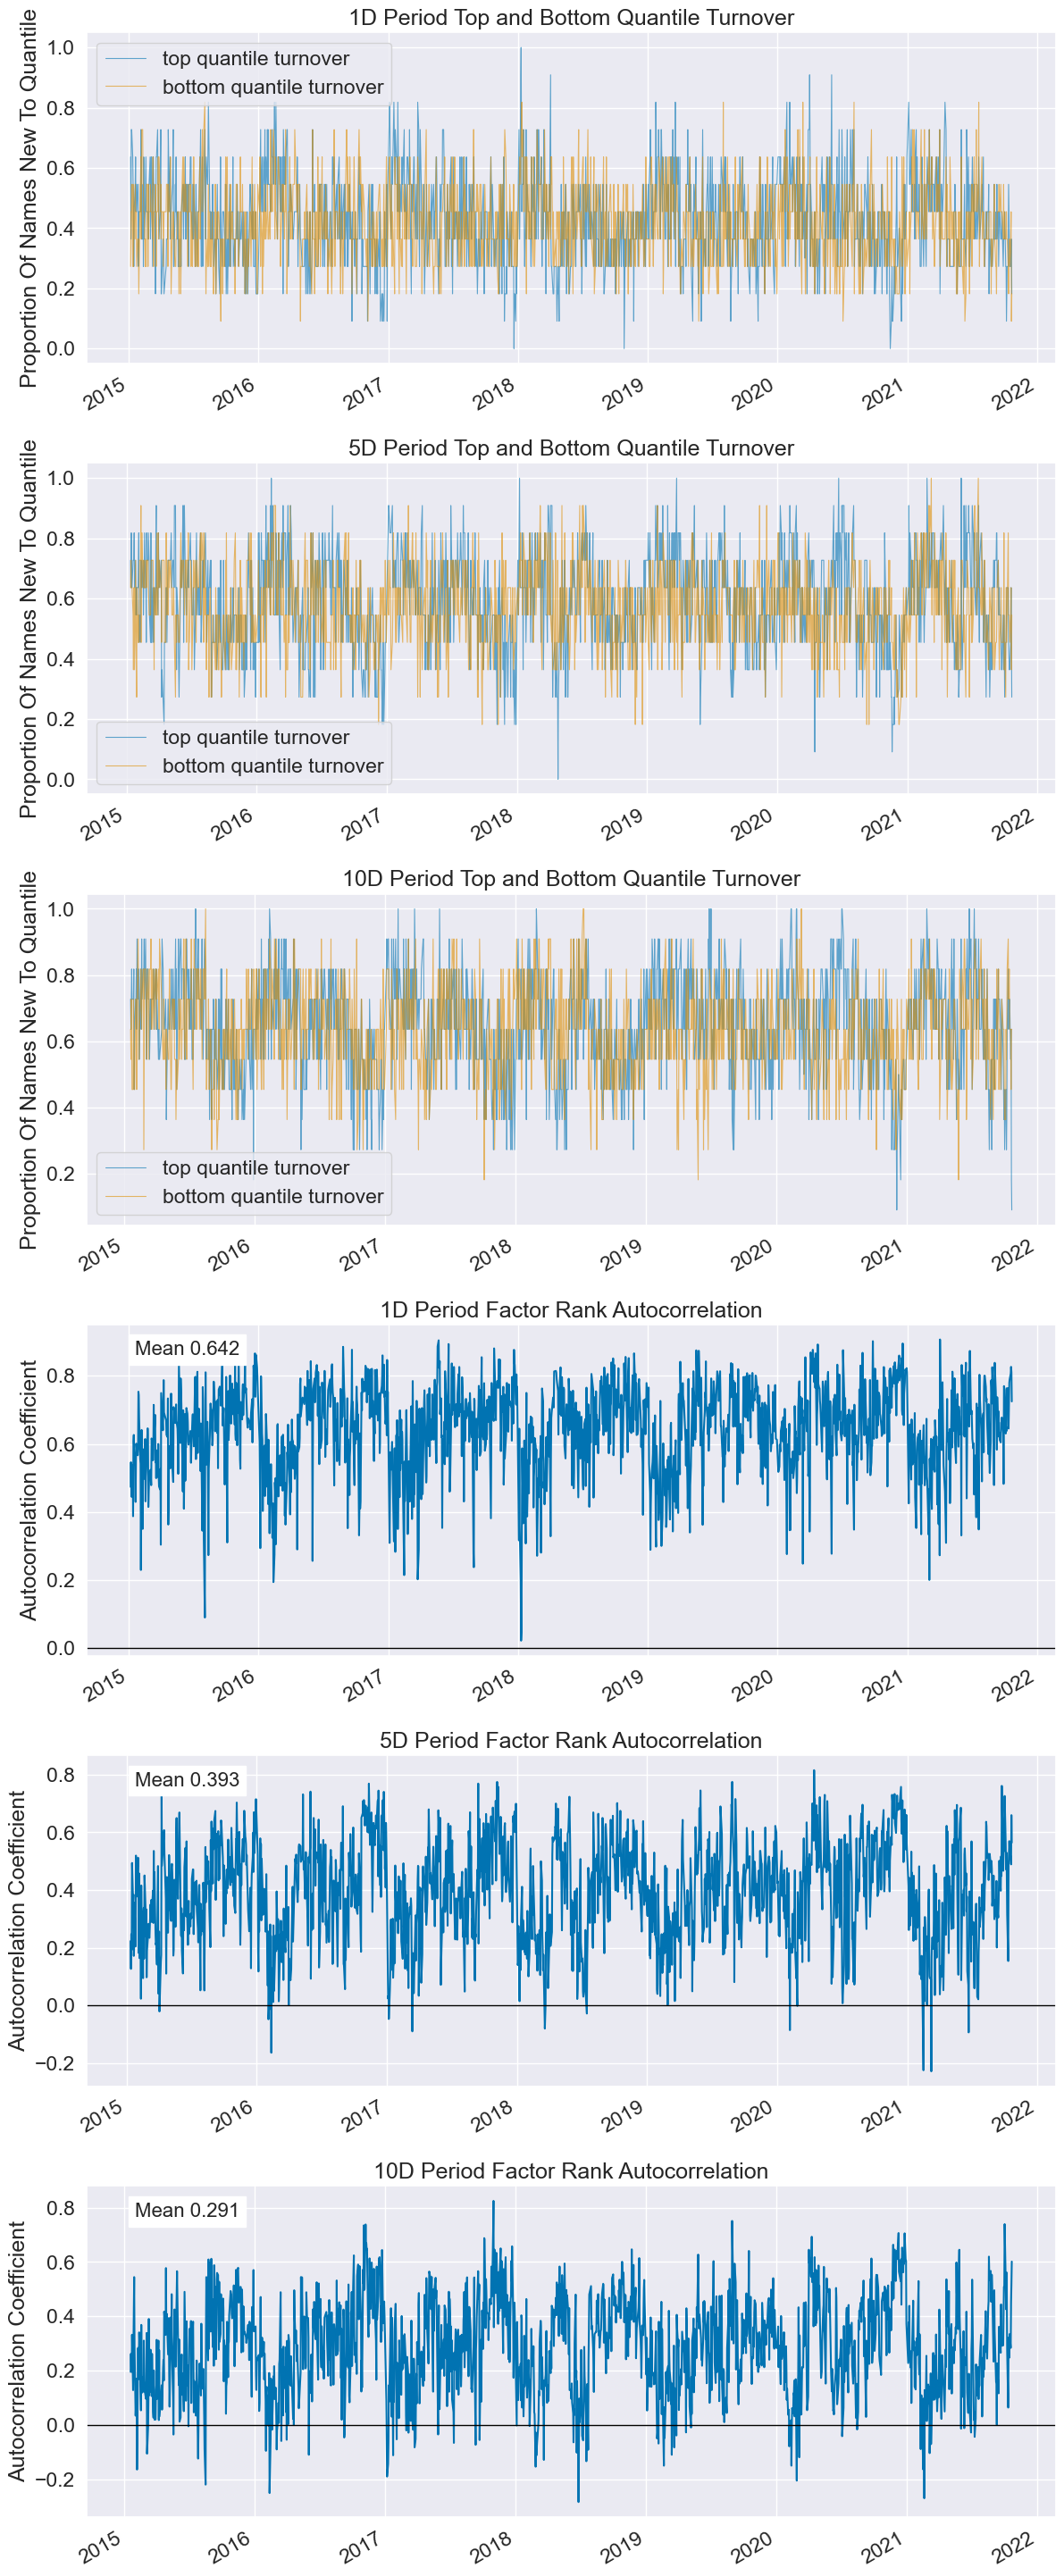

In [7]:
# Turnover analysis
# ! note that create_turnover_tear_sheet was modified since the original code throws an error. in the get_forward_returns_columns, I changed .get_values() to .values since the former does not exist in the current version of the library anymore (reference is in the cell below)
al.tears.create_turnover_tear_sheet(factor_data)

In [8]:
al.utils.get_forward_returns_columns(factor_data.columns, require_exact_day_multiple=True).values

array(['1D', '5D', '10D'], dtype=object)